# Section 1

## Problem Statement

Using the famouse Ames Housing DataSet, What are some of the features that affect the final sale price the most? 
I will be attempting to use Regression models(Linear and Logistic) as well as train-test-split , Ridge and Lasso to get the best prediciton model that I possibly can.

#### DATA USED:
* *Notebook 1:* Training Data Cleaned (With EDA, and some Feature Engineering)
* *Notebook 2:* Testing Data Cleaned
* *Notebook 3:* Modeling and Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train_clean = pd.read_csv("train_clean.csv")

In [4]:
test = pd.read_csv("test_clean.csv")

# Reading in cleaned train and test data

In [5]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
test.head() #Keep in mind that i did lose most of my Dummifying code, but that was hurting my models, anyway

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,...,garage_yr_blt,garage_finish,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,sale_type
0,0,2658,902301120,190,RM,69,9142,Pave,Reg,Lvl,...,1910,Unf,1,440,1,0,60,4,2006,WD
1,1,2718,905108090,90,RL,69,9662,Pave,IR1,Lvl,...,1977,Fin,2,580,1,170,0,8,2006,WD
2,2,2414,528218130,60,RL,58,17104,Pave,IR1,Lvl,...,2006,RFn,2,426,1,100,24,9,2006,New
3,3,1989,902207150,30,RM,60,8520,Pave,Reg,Lvl,...,1935,Unf,2,480,0,0,0,7,2007,WD
4,4,625,535105100,20,RL,69,9500,Pave,IR1,Lvl,...,1963,RFn,2,514,1,0,76,7,2009,WD


In [7]:
train.columns
#Somehow, unnamed:0 snuck in here. need to drop that

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
#dropping Unnamed: 0
# train.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# Original attempt at data
# X = train.drop('saleprice', axis = 1)
 # use the list to create feature matrix (X)
## X = ads[['TV', 'radio', 'newspaper']] # another way to create X - uncomment to run
# y = train['saleprice'] # Create y vector

## MODELS

In [11]:
features = [col for col in train_clean._get_numeric_data().columns if col != 'saleprice']
X = train_clean[features]
y = train_clean['saleprice']
# X df is all columns but saleprice, y is only saleprice

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Unnamed: 0,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,year_built,year_remod/add,mas_vnr_area,...,garage_finish_Unf,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
415,415,2045,904100100,70,107,12888,7,1937,1980,0,...,0,0,0,0,0,0,0,0,0,1
273,273,1962,535451110,20,60,7200,5,1950,2002,0,...,0,0,0,0,0,0,0,0,0,1
1146,1147,445,528142130,20,85,10655,8,2003,2004,296,...,0,0,0,0,0,0,0,0,0,1
250,250,1105,528363020,60,69,11929,8,1995,1995,466,...,0,0,0,0,0,0,0,0,0,1
413,413,909,909178160,50,60,9900,6,1940,1950,0,...,1,0,0,0,0,0,0,0,0,1


In [15]:
y_test.shape

(513,)

In [16]:
y.mean()

181479.01805758907

In [20]:
# Thanks to Zach and Gabe:
features = [col for col in train_clean._get_numeric_data().columns if col != 'saleprice']
X = train_clean[features]
y = train_clean['saleprice']
# X df is all columns but saleprice, y is only saleprice

In [21]:
remove_from_train = []
for i in X.columns:
        if i not in test.columns:
            remove_from_train.append(i)
X.drop(columns=remove_from_train, inplace=True)

In [22]:
remove_from_test = []
for i in test.columns:
        if i not in X.columns:
            remove_from_test.append(i)
test.drop(columns=remove_from_test, inplace=True)

In [23]:
# Creating and fitting Linear Regression model
test_id = test['id']

features2 = test
features2._get_numeric_data()
lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(features2)

In [24]:
final_df = pd.concat([test_id, pd.Series(y_pred)], axis=1)

In [25]:
final_df.rename(columns={0: 'SalePrice'}, inplace=True)

In [26]:
final_df.sort_values(by='id', inplace=True)

In [27]:
final_df.to_csv("kaggle_attempt_923.csv", index=False)
# Saving information to csv that was submitted to Kaggle - 7th place!

In [28]:
# Please keep in mind that this submission was after TONS of trial and error. I finally got help
# and put the code to submit my kaggle submissions near the top -- above here.

# Below were additional tests(some of which may not be running now?) and visualizations

In [29]:
print(lr.intercept_)
print(lr.coef_)

20890016.95990086
[ 4.95508589e-01 -1.63666515e+01  8.80955745e-06 -1.09787040e+02
  9.99628976e+01  6.69862458e-01  1.76764067e+04  2.21562830e+02
  3.66490285e+02  3.65643009e+01  2.36081018e+01  1.76832933e+01
 -7.75649324e+03  2.83800400e+01  2.56128491e+01  3.09730533e+01
  2.51772878e+03 -6.93628060e+03 -2.26286749e+03 -4.45592322e+02
  4.73641193e+03  9.53118181e+01 -1.25530450e+03  3.16922211e+01
 -4.45717154e+03  1.44466521e+01  1.55537956e+01  6.81246832e+01
 -1.10931929e+04]


In [30]:
lr.predict(X)

array([176071.04517905, 243753.5550565 , 134847.26226415, ...,
       150022.98124633, 117220.66546072, 203044.18243191])

In [31]:
y_pred.shape

(878,)

In [32]:
MRSE

NameError: name 'MRSE' is not defined

In [34]:
# Statistical Summary for SalePrice

train_clean['saleprice'].describe()

count      2049.000000
mean     181479.018058
std       79295.913255
min       12789.000000
25%      129800.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [35]:
pred=pd.DataFrame(y_pred)
kaggle_df=pd.read_csv('sample_sub_reg.csv')
datasets=pd.concat([kaggle_df['Id'],pred], axis=1)
datasets.columns=["Id","SalePrice"]
datasets.to_csv("submission_CB1.csv", index=False)

In [37]:
train.describe()

# Shows all information for the dataframe

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [39]:
# Statistical Summary for SalePrice

train_clean['saleprice'].describe()

count      2049.000000
mean     181479.018058
std       79295.913255
min       12789.000000
25%      129800.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [40]:
y_test

1972    118000
694     302000
906      97000
544     137000
1846    119000
         ...  
445     124000
845     250000
1302    300000
1181    110000
1131    250000
Name: saleprice, Length: 513, dtype: int64

In [41]:
y_pred.shape

(878,)

In [42]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.8981940130823253

In [43]:
# Make predictions
y_pred = lr.predict(X)

In [44]:
resids = y - y_pred

In [45]:
# (THREAD) Compute the MSE
mse = np.mean(resids**2)
mse

832516726.8619955

In [46]:
# Create the predictions for the "null model"
y_bar = np.mean(y)
y_bar

181479.01805758907

In [47]:
# The null MSE
null_mse = np.mean((y - y_bar)**2)
null_mse

6284773122.026522

In [48]:
# The R2
1 - mse / null_mse

0.8675343229265926

In [49]:
# Can compute it from metrics...
metrics.r2_score(y, y_pred)

0.8675343229265925

In [50]:
# ... or directly from the model...
lr.score(X, y)

0.8675343229265925

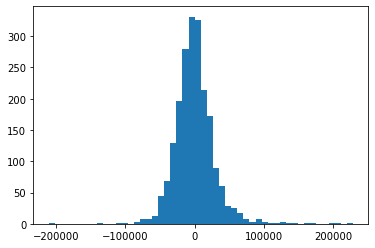

In [51]:
resids = y - lr.predict(X)
plt.hist(resids, bins=50);

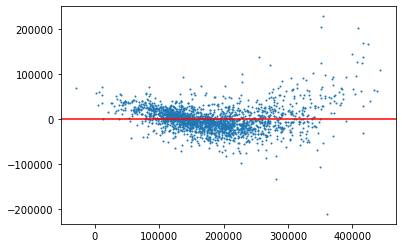

In [52]:
plt.scatter(lr.predict(X), resids, s=1)
plt.axhline(0, color="red");

In [53]:
cross_val_score(lr, X, y, cv=5).mean()

0.860699582204675

In [54]:
# sns.heatmap(train.corr(), annot=True, cmap='coolwarm');

In [55]:
# Was working before, doesn't seem to be now.
# resids = y_test - lr.predict(X_test)
# sns.scatterplot(x = y_test, y = resids)
# plt.ylabel('Error (USD)')
# plt.axhline(0, color='r');

# print("Standard deviation of residuals:", round(resids.std(), 0))

In [56]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [57]:
cross_val_score(lr, X, y, cv=5).mean()

0.860699582204675

In [58]:
lasso = LassoCV(n_alphas=200)

In [59]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [60]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

-8.254553381800693e+25

In [61]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

0.9040834921545257

In [62]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.8959876633326407

In [63]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [64]:
ridge.score(X_train, y_train)

0.9340046505781121

In [65]:
ridge.score(X_test, y_test)

0.9231960699415074

In [66]:
ridge_scores.mean()

0.8959876633326407

In [67]:
pred = ridge.predict(X_test)

In [68]:
r2_score(y_test, pred)

0.9231960699415074

<AxesSubplot:>

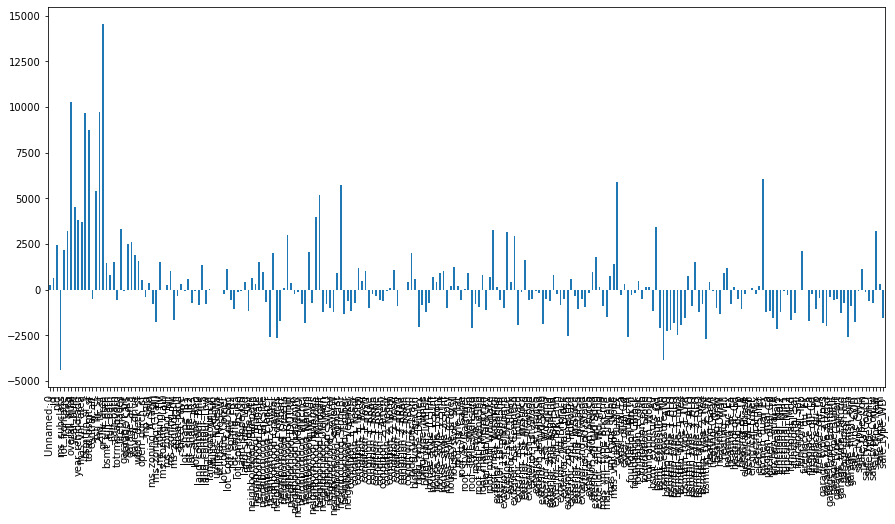

In [69]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))

In [70]:
residuals = y_test - pred

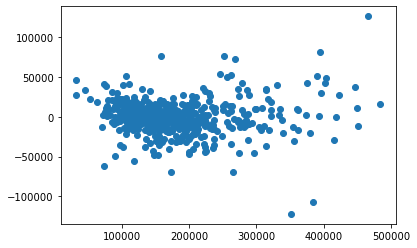

In [71]:
plt.scatter(pred, residuals)

In [72]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [73]:
y_pred

array([176071.04517905, 243753.5550565 , 134847.26226415, ...,
       150022.98124633, 117220.66546072, 203044.18243191])

In [74]:
lr = LinearRegression

In [75]:
from math import sqrt

In [77]:
train_clean[train_clean.columns[1:-1]].apply(lambda x: x.corr(train_clean['saleprice']))

id                -0.051416
pid               -0.255068
ms_subclass       -0.087331
lot_frontage       0.338975
lot_area           0.303744
                     ...   
sale_type_ConLD   -0.060443
sale_type_ConLI    0.019582
sale_type_ConLw   -0.035486
sale_type_New      0.360599
sale_type_Oth     -0.030115
Length: 235, dtype: float64

In [78]:
import missingno as msno

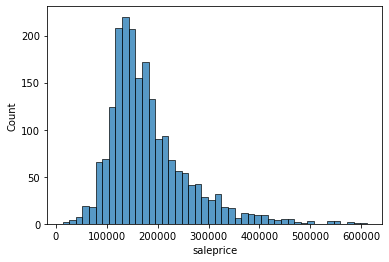

In [89]:
# Visualization of Sale Price overall
sns.histplot(train_clean['saleprice'] ), ;

#### I HOPE this clearly shows the effort that I was making...I worked on this project for over four days and the entire night before presenting, as well as after to try to clean this up. If it is missing anything, I apologize; I do not have time to go through and do anything further.. Thank you for understanding

---------------------
---------------------
---------------------

# VISUALIZATIONS

In [90]:
from matplotlib.pyplot import figure

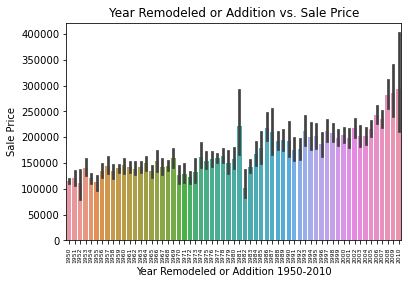

In [92]:
sns.barplot(x = train_clean['year_remod/add'], y = train_clean['saleprice'])
plt.title("Year Remodeled or Addition vs. Sale Price")
plt.xlabel("Year Remodeled or Addition 1950-2010")
plt.ylabel("Sale Price")
plt.xticks(rotation=90, fontsize=6);

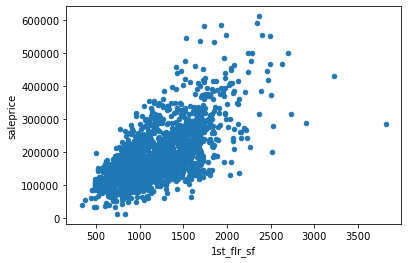

In [93]:
var = "1st_flr_sf"
data = pd.concat([train_clean['saleprice'], train_clean[var]], axis=1)
data.plot.scatter(x=var, y='saleprice'), ;

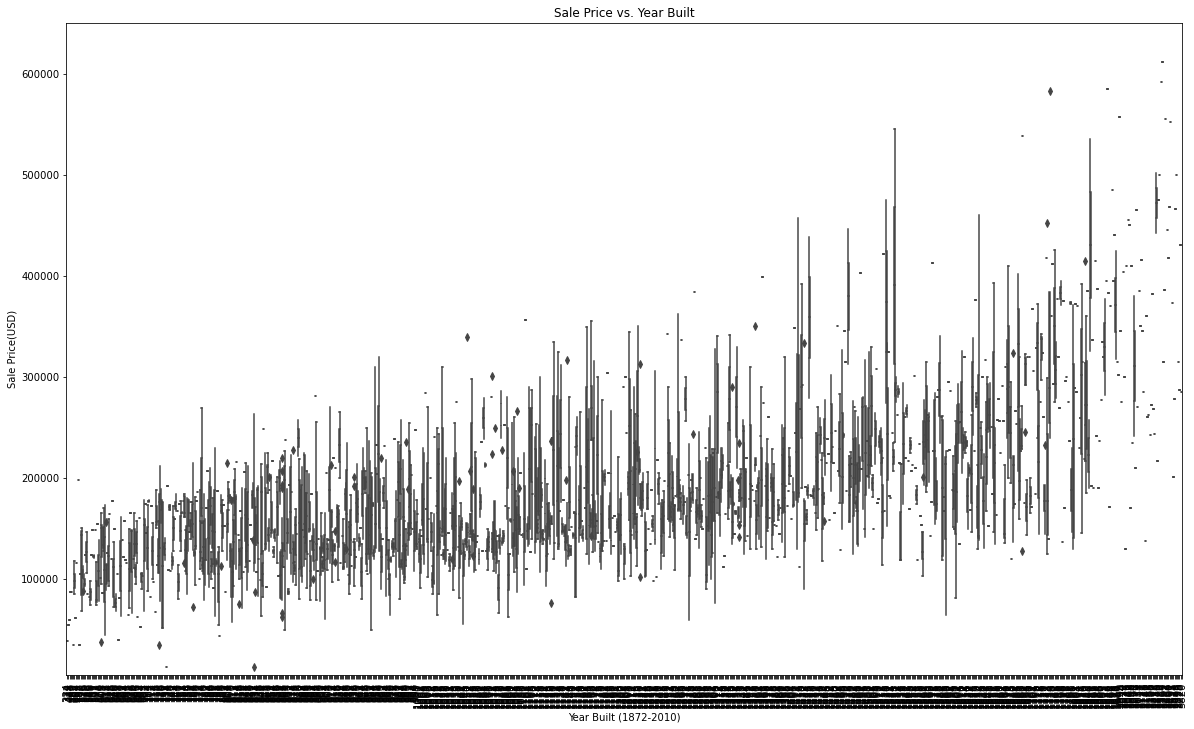

In [95]:
var = "1st_flr_sf"
data = pd.concat([train_clean['saleprice'], train_clean[var]], axis=1)
f, ax = plt.subplots(figsize=(20,12))
fig = sns.boxplot(x=var, y='saleprice', data=train_clean)
fig.axis(ymin=5_000, ymax=65_0000)
plt.xticks(rotation=90)
plt.title('Sale Price vs. Year Built')
plt.xlabel('Year Built (1872-2010)')
plt.ylabel('Sale Price(USD)');
#Couldn't read xvars

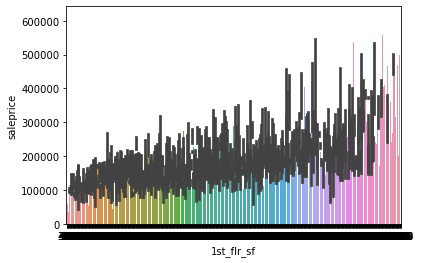

In [97]:
fig.figsize=(20,10)
sns.barplot(x = train_clean['1st_flr_sf'], y = train_clean['saleprice']);

In [98]:
train['Year Built'].min()
# confirming min and max of year_built

1872

In [100]:
train['Year Built'].max()

# Houses range from 1872 to 2010

2010

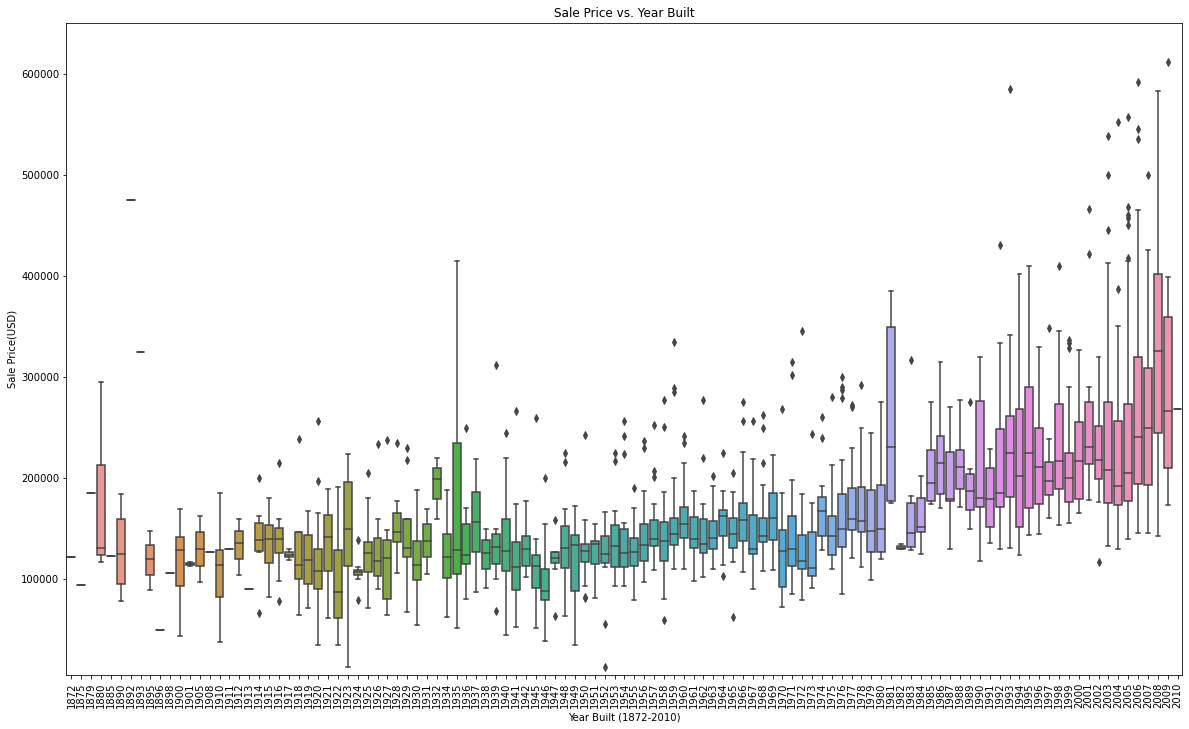

In [102]:
var = "year_built"
data = pd.concat([train_clean['saleprice'], train_clean[var]], axis=1)
f, ax = plt.subplots(figsize=(20,12))
fig = sns.boxplot(x=var, y='saleprice', data=train_clean)
fig.axis(ymin=5_000, ymax=65_0000)
plt.xticks(rotation=90)
plt.title('Sale Price vs. Year Built')
plt.xlabel('Year Built (1872-2010)')
plt.ylabel('Sale Price(USD)');

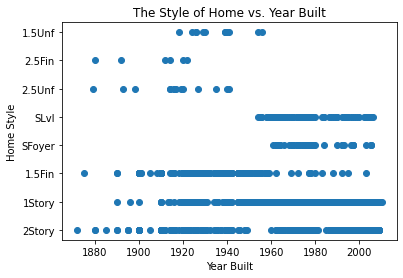

In [103]:
plt.scatter(train['Year Built'], train['House Style'])
plt.title("The Style of Home vs. Year Built")
plt.xlabel("Year Built")
plt.ylabel("Home Style");

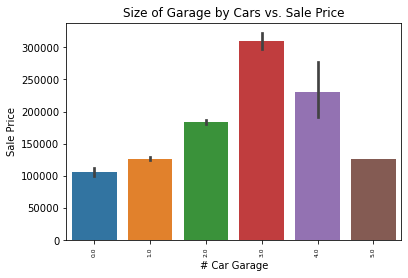

In [104]:
fig.figsize=(16,9)
sns.barplot(x = train['Garage Cars'], y = train['SalePrice'])
plt.title("Size of Garage by Cars vs. Sale Price")
plt.xlabel("# Car Garage")
plt.ylabel("Sale Price")
plt.xticks(rotation=90, fontsize=6);

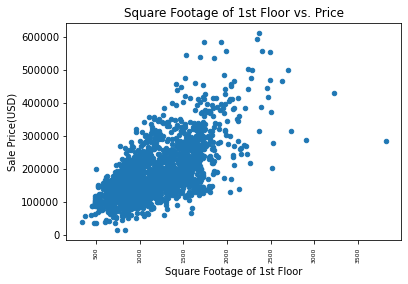

In [105]:
fig.figsize=(16,9)
var = "1st_flr_sf"
data = pd.concat([train_clean['saleprice'], train_clean[var]], axis=1)
data.plot.scatter(x=var, y='saleprice'), ;
plt.title('Square Footage of 1st Floor vs. Price')
plt.xlabel('Square Footage of 1st Floor')
plt.ylabel('Sale Price(USD)');
plt.xticks(rotation=90, fontsize=6);

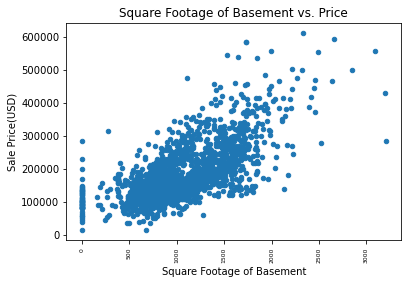

In [106]:
fig.figsize=(16,9)
var = "total_bsmt_sf"
data = pd.concat([train_clean['saleprice'], train_clean[var]], axis=1)
data.plot.scatter(x=var, y='saleprice'), ;
plt.title('Square Footage of Basement vs. Price')
plt.xlabel('Square Footage of Basement')
plt.ylabel('Sale Price(USD)');
plt.xticks(rotation=90, fontsize=6);

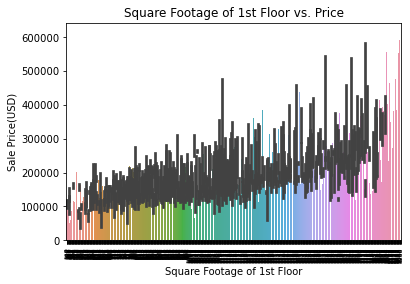

In [107]:
fig.figsize=(16,9)
sns.barplot(x = train_clean['total_bsmt_sf'], y = train_clean['saleprice'])
plt.title('Square Footage of 1st Floor vs. Price')
plt.xlabel('Square Footage of 1st Floor')
plt.ylabel('Sale Price(USD)');
plt.xticks(rotation=90, fontsize=6);

C:\Users\Burger\anaconda3\envs\dsi\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


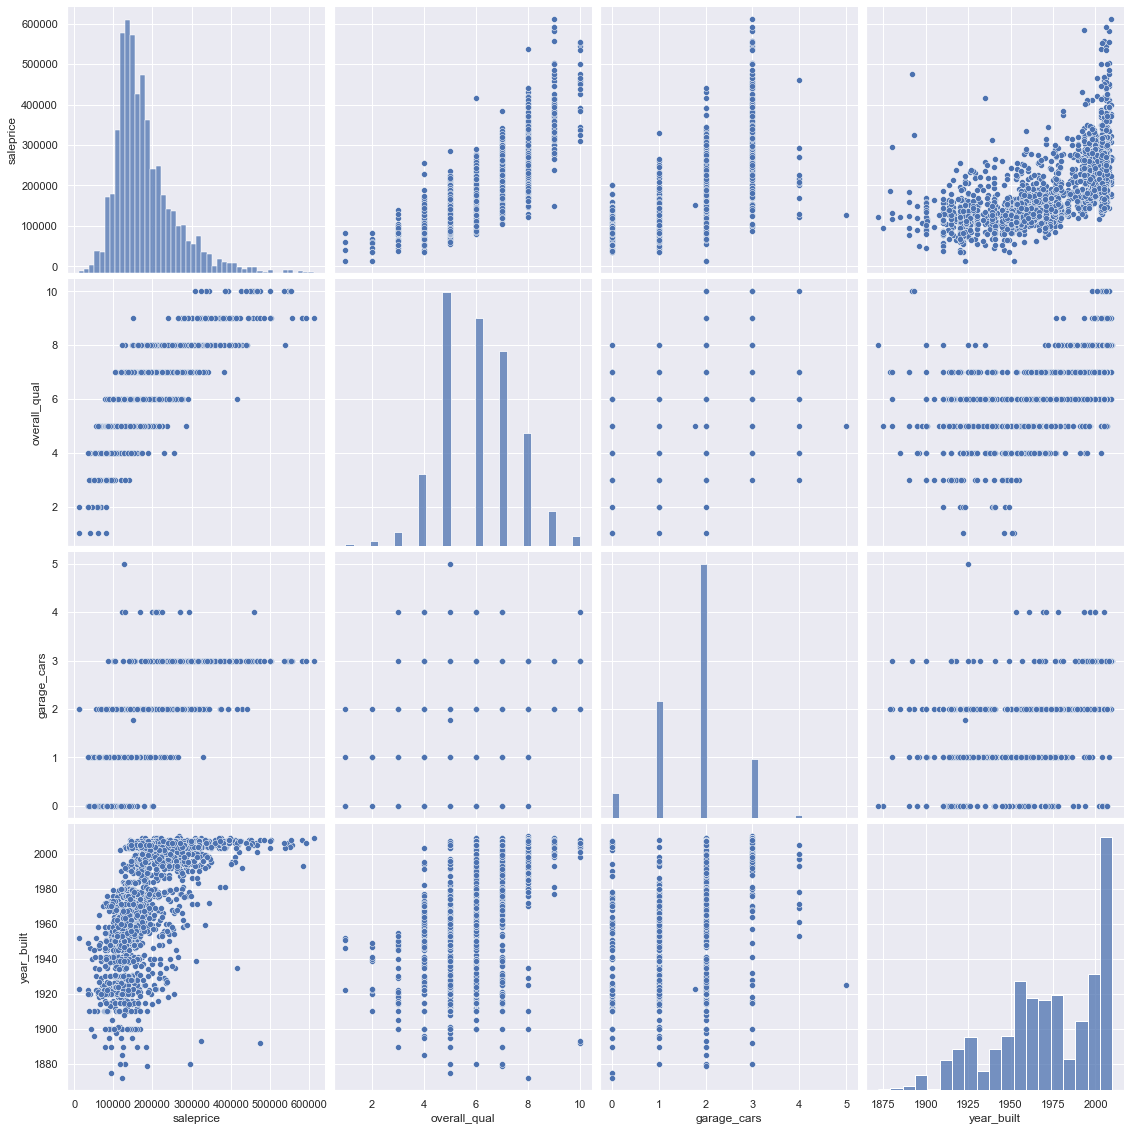

In [108]:
sns.set()
cols = ['saleprice', 'overall_qual', 'garage_cars', 'year_built']
sns.pairplot(train_clean[cols], size = 4)
plt.show();

C:\Users\Burger\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


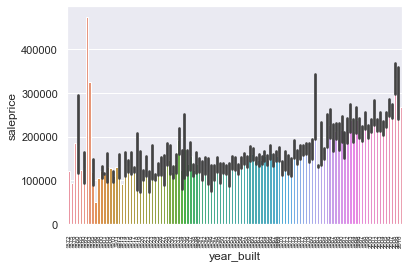

In [109]:
sns.barplot(train_clean['year_built'], train_clean['saleprice'])
plt.xticks(rotation=90, fontsize=6);

C:\Users\Burger\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


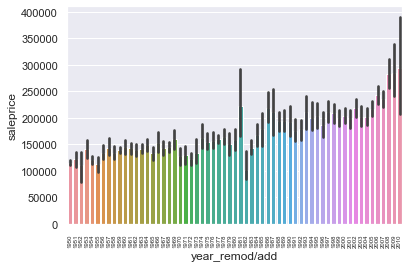

In [110]:
fig.figsize=(18,10)
sns.barplot(train_clean['year_remod/add'], train_clean['saleprice'])
plt.xticks(rotation=90, fontsize=6);